# Prereading data analysis

## Loading data and survey data

In [136]:
%matplotlib inline
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import getpass
import math

In [137]:
# from scipy import stats 
dfraw = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_160217_JBS_removed_empty_columns.csv')
dfsurvey = pd.read_csv('C:\Users\\'+getpass.getuser()+'\Desktop\Clean-data_addSurvey_160309_JBS_removed_empty_columns.csv')
#please read this about unicode strings eventually: http://www.joelonsoftware.com/articles/Unicode.html


# Klugetastic: make a list, convert to an array and then a df
datalist = []
#header = df.keys()
topics = ['Blackbody','Masses','Resonance']
treatments = ['TextThenPhet','TextOnly','PhetThenText']


#merge with main dataframe
dfmerged = pd.merge(left=dfraw,right=dfsurvey, left_on='anon-id', right_on='anon-id')

phetquestion = {'Blackbody':'q01 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Masses':'q5 - Approximately how long did you spend with the PhET simulation? (in minutes)',
                'Resonance':'q6 - Approximately how long did you spend with the PhET simulation? (in minutes)'}
textquestion = {'Blackbody':'q02 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Masses':'q6 - Approximately how long did you spend reading the textbook sections? (in minutes)',
                'Resonance':'q7 - Approximately how long did you spend reading the textbook sections? (in minutes)'}

conv_pos = {'nan':np.nan, 'Not at all':0.0, 'Somewhat':1.0, 'Mostly':2.0, 'Definitely':3.0}
conv_neg = {'nan':np.nan, 'Not at all':3.0, 'Somewhat':2.0, 'Mostly':1.0, 'Definitely':0.0}

encountered_question = {'Blackbody':'q03 -  Have you learned about blackbody radiation before? (Choose all that apply.)',
                        'Masses':'q7 - Have you learned about simple harmonic motion before? (Choose all that apply.)',
                        'Resonance':'q8 - Have you learned about resonance before? (Choose all that apply.)'}

def transform_encountered(response):
    response = str(response)
    if response == 'No.':
        return False
    if 'Yes' in response:
        return True
    else: 
        return np.nan

#now we iterate through the dataframe and creat a row per student x topic
for index, row in dfmerged.iterrows():
    for topic in topics:
        #print row['q5 - For me personally; PhET Sims are usually useless.']
        calculated_survey = (float(conv_neg[str(row['q2 - For me personally; PhET Sims are usually boring.']).split('<')[0]])+
                    float(conv_neg[str(row['q5 - For me personally; PhET Sims are usually useless.']).split('<')[0]])+
                    float(conv_pos[str(row['q4 - For me personally; PhET Sims are usually fun.']).split('<')[0]])+
                    float(conv_pos[str(row['q3 - For me personally; PhET Sims are usually productive.']).split('<')[0]]))/4.0
        datalist.append([str(row['anon-id']),
                        str(row["Reading group_x"]),
                        float(str(row['PreScore.'+topic]).replace('%',''))/100.0,
                        topic,
                        row['Treatment.'+topic+'_x'],
                        float(str(row['PostScore.'+topic]).replace('%',''))/100.0,
                        float(str(row['ClickerScore.'+topic]).replace('%',''))/100.0,
                        row[textquestion[topic]],
                        row[phetquestion[topic]],
                        calculated_survey,
                        row['q9 - How beneficial was this assignment to your learning?'],
                        row['q10 - How much did you enjoy this assignment?'],
                        transform_encountered(row[encountered_question[topic]])
                        ])

# convert list2 to an array then a dataframe
array2 = np.array(datalist)
colnames = ['student id',"Reading group",'Prescore','Topic','Treatment',
            'Postscore','Clickerscore','Time on text','Time on PhET',
            'Preattitude','Postattitude - benefitted','Postattitude - enjoyed','Encountered']
df = pd.DataFrame(array2,columns=colnames)

## Organizing the dataframe

Now that we have our data frame we can see what it looks like:

In [138]:
df

,student id,Reading group,Prescore,Topic,Treatment,Postscore,Clickerscore,Time on text,Time on PhET,Preattitude,Postattitude - benefitted,Postattitude - enjoyed,Encountered
0,5963,3,nan,Blackbody,TextOnly,1.0,0.67,nan,nan,nan,Not very beneficial.,Somewhat enjoyed it.,nan
1,5963,3,nan,Masses,TextThenPhet,1.0,1.0,25.0,7.0,nan,Not very beneficial.,Somewhat enjoyed it.,True
2,5963,3,nan,Resonance,PhetThenText,0.67,0.33,20.0,6.0,nan,Not very beneficial.,Somewhat enjoyed it.,True
3,25630,1,0.33,Blackbody,PhetThenText,0.67,0.67,nan,nan,nan,Somewhat beneficial.,Somewhat enjoyed it.,nan
4,25630,1,0.0,Masses,TextOnly,0.0,0.75,20.0,0.0,nan,Somewhat beneficial.,Somewhat enjoyed it.,True
5,25630,1,1.0,Resonance,TextThenPhet,0.67,0.0,20.0,10.0,nan,Somewhat beneficial.,Somewhat enjoyed it.,True
6,41441,1,0.67,Blackbody,PhetThenText,0.67,0.67,nan,nan,nan,Somewhat beneficial.,Somewhat enjoyed it.,nan
7,41441,1,0.0,Masses,TextOnly,0.0,0.75,30.0,0.0,nan,Somewhat beneficial.,Somewhat enjoyed it.,False
8,41441,1,0.67,Resonance,TextThenPhet,0.33,0.0,15.0,8.0,nan,Somewhat beneficial.,Somewhat enjoyed it.,False
9,51900,1,0.33,Blackbody,PhetThenText,1.0,0.67,nan,nan,nan,nan,nan,nan


First we want to make sure that the columns containing numerical data are treated as such. Let's also collapse the post attitude columns

In [139]:
#converting columns to numerical types
for column in ['Prescore','Postscore','Clickerscore', 'Time on text','Time on PhET']:
    df[column] = pd.to_numeric(df[column],errors='coerce')
df = df.fillna(np.nan)

def transform_enjoy(response):
    response = str(response)
    if 'No' in response or 'not' in response:
        return False
    elif 'enjoy' in response: 
        return True
    else: return np.nan
    
def transform_benefit(response):
    response = str(response)
    if 'Not' in response:
        return False
    elif 'beneficial' in response: 
        return True
    else: return np.nan
    
df['Benefitted'] = df['Postattitude - benefitted'].apply(transform_benefit)
df['Enjoyed'] = df['Postattitude - enjoyed'].apply(transform_enjoy)

Unfortunately we have a lot of rows with missing data. If we remove them, we end up with almost half the dataset. We will use this dataset when looking at engagement.

In [140]:
df2 = df.dropna()
df2.shape, df.shape

((531, 15), (1533, 15))

## Descriptors
### Did the students learn?
Let's get a sense of what the students were doing. First let's compare their pre and post scores. In these boxplots, means are in green and medians in red.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001432BB38>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001422D2B0>], dtype=object)

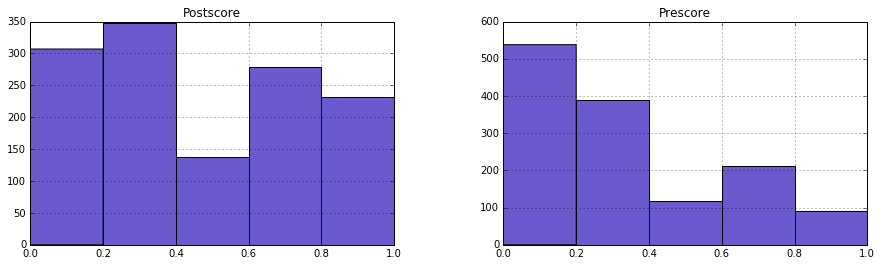

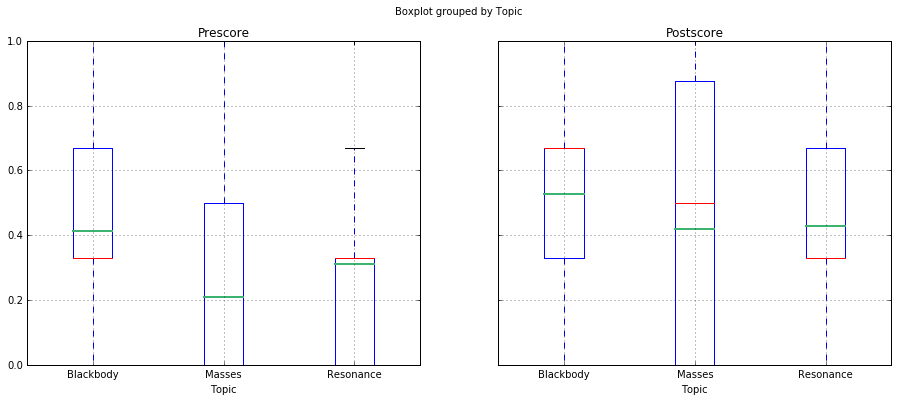

In [141]:
df.hist(column=['Prescore','Postscore'],bins=5, layout=(1,2),figsize=(15,4),color='slateblue')
meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df.boxplot(by='Topic',
                column=['Prescore','Postscore'],
                figsize=(15,6),
                meanprops=meanlineprops, meanline=True, showmeans=True)

We can see from the histograms that we a wide spectrum of knowledge levels. The boxplots confirm that the student did indeed learn, as post-scores increased for all topics though in varying amounts per topic. We do a Mann-Whitney test (the equivalent a simple t-test for non normal data) to find out if the difference in score is significant.

In [142]:
from scipy.stats import mannwhitneyu
m = mannwhitneyu(df[df['Topic']=='Masses']['Prescore'],df[df['Topic']=='Masses']['Postscore'])
r = mannwhitneyu(df[df['Topic']=='Resonance']['Prescore'],df[df['Topic']=='Resonance']['Postscore'])
b = mannwhitneyu(df[df['Topic']=='Blackbody']['Prescore'],df[df['Topic']=='Blackbody']['Postscore'])
print("The significance of the post score difference is:\n{0} for Masses, \n{1} for Resonance, \n{2} for Blackbody".format(m,r,b))

The significance of the post score difference is:
MannwhitneyuResult(statistic=95307.0, pvalue=2.2123823670513139e-15) for Masses, 
MannwhitneyuResult(statistic=98824.0, pvalue=3.5489988668011413e-12) for Resonance, 
MannwhitneyuResult(statistic=116252.0, pvalue=0.001570114610541258) for Blackbody


### How were they engaged in the activity?
Next we look at the time spent on task. Next let's look at how much time they spent on each activity.

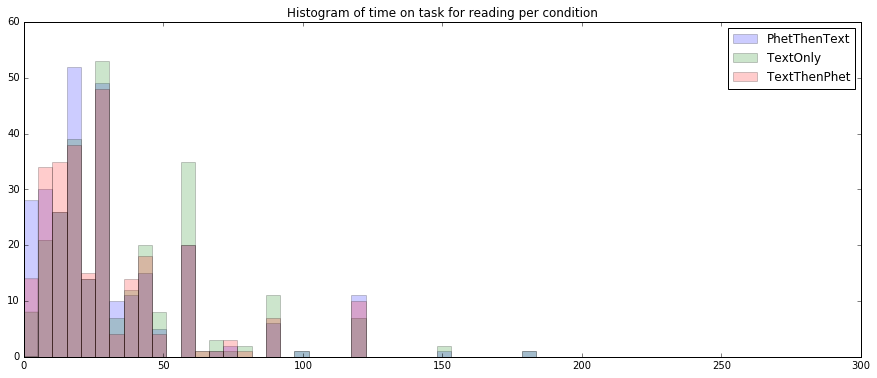

In [143]:
bins = np.linspace(0, 250, 50)
plt.figure(figsize=(15,6))
plt.hist(df[df['Treatment']=='PhetThenText']['Time on text'], bins, alpha=0.2, label='PhetThenText')
plt.hist(df[df['Treatment']=='TextOnly']['Time on text'], bins, alpha=0.2, label='TextOnly')
plt.hist(df[df['Treatment']=='TextThenPhet']['Time on text'], bins, alpha=0.2, label='TextThenPhet')
plt.legend(loc='upper right');plt.xlabel = 'minutes';plt.ylabel = 'Count of students'
plt.title('Histogram of time on task for reading per condition')

In [144]:
p = mannwhitneyu(df[df['Treatment']=='TextThenPhet']['Time on PhET'],df[df['Treatment']=='PhetThenText']['Time on PhET'])
t = mannwhitneyu(df[df['Treatment']=='TextThenPhet']['Time on text'],df[df['Treatment']=='PhetThenText']['Time on text'])
print("The significance of difference between time on task of conditions:\n{0} for Phet, \n{1} for text".format(p,t))

The significance of difference between time on task of conditions:
MannwhitneyuResult(statistic=104747.0, pvalue=0.98307411002794387) for Phet, 
MannwhitneyuResult(statistic=107757.0, pvalue=0.46439842056534641) for text


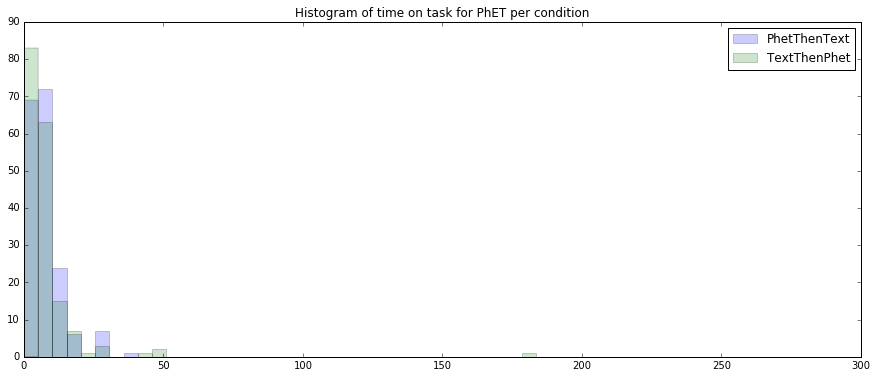

In [148]:
bins = np.linspace(0, 250, 50)
plt.figure(figsize=(15,6))
plt.hist(df2[df2['Treatment']=='PhetThenText']['Time on PhET'], bins, alpha=0.2, label='PhetThenText')
plt.hist(df2[df2['Treatment']=='TextThenPhet']['Time on PhET'], bins, alpha=0.2, label='TextThenPhet')
plt.legend(loc='upper right')
#;plt.xlabel('minutes');plt.ylabel('Count of students');
plt.title('Histogram of time on task for PhET per condition')

In [149]:
df['Time on task overall'] = df['Time on text']+df['Time on PhET']

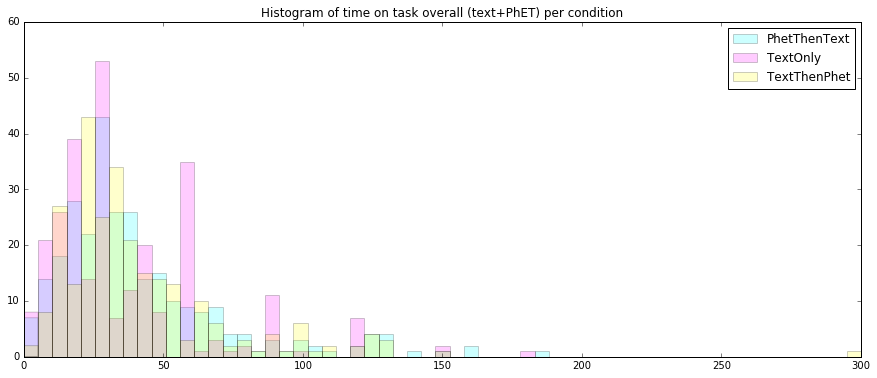

In [151]:
bins = np.linspace(0, 300, 60)
plt.figure(figsize=(15,6))
plt.hist(df[df['Treatment']=='PhetThenText']['Time on task overall'], bins, alpha=0.2, label='PhetThenText',color='cyan')
plt.hist(df[df['Treatment']=='TextOnly']['Time on task overall'], bins, alpha=0.2, label='TextOnly',color='magenta')
plt.hist(df[df['Treatment']=='TextThenPhet']['Time on task overall'], bins, alpha=0.2, label='TextThenPhet', color='yellow')
plt.legend(loc='upper right');
#plt.xlabel('minutes');plt.ylabel('Count of students');
plt.title('Histogram of time on task overall (text+PhET) per condition')

Clearly more time was spent reading than using PhET, with very few students using PhET for more than 10 minutes. Let's now compare the performance of students given their time on task. First we provide definitions of "engagement" using median measures.

In [152]:
t = mannwhitneyu(df[df['Treatment']=='TextThenPhet']['Time on text'],df[df['Treatment']=='PhetThenText']['Time on text'])

In [153]:
phet_median = df2[df2['Treatment']!='TextOnly']['Time on PhET'].median()
df2['Engaged PhET'] = df2[df2['Treatment']!='TextOnly']['Time on PhET'] >= phet_median
text_median = df2['Time on text'].median()
df2['Engaged text'] = df2['Time on text'] >= text_median
'The median engagment times for PhET and text are {0} and {1} minutes.'.format(phet_median,text_median)

C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\sperez8\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'The median engagment times for PhET and text are 8.0 and 30.0 minutes.'

## Prior and knowledge and attitude influence on engagement
### If they already encountered the topic were they more likely to be engaged?
### If they already encountered the topic were they more likely to score well on the pretest?

In [157]:
m0 = mannwhitneyu(df2[df2['Encountered']=='False']['Engaged PhET'],df2[df2['Encountered']=='True']['Engaged PhET'])
m1 = mannwhitneyu(df2[df2['Encountered']=='False']['Engaged text'],df2[df2['Encountered']=='True']['Engaged text'])
m2 = mannwhitneyu(df2[df2['Encountered']=='False']['Prescore'],df2[df2['Encountered']=='True']['Prescore'])
print("The significance of difference between having encountered the topic\n on Engagement with Phet: {0}\n on Engagement with text: {1}\n and on prescore {2}".format(m0,m1,m2))

The significance of difference between having encountered the topic
 on Engagement with Phet: MannwhitneyuResult(statistic=35352.0, pvalue=0.92751019151315339)
 on Engagement with text: MannwhitneyuResult(statistic=33073.5, pvalue=0.16402941901550361)
 and on prescore MannwhitneyuResult(statistic=30962.5, pvalue=0.0096002869873254102)


We can see that yes, there was an effect on their prescore, but not their engagement in either Phet not text.

### If they enjoyed the activity, were they more likely to be engaged?
### If they benefitted from the activity, were they more likely to be engaged?

In [159]:
m3 = mannwhitneyu(df2[df2['Benefitted']==False]['Engaged PhET'],df2[df2['Benefitted']==True]['Engaged PhET'])
m4 = mannwhitneyu(df2[df2['Enjoyed']==False]['Engaged PhET'],df2[df2['Enjoyed']==True]['Engaged PhET'])
m5 = mannwhitneyu(df2[df2['Benefitted']==False]['Engaged text'],df2[df2['Benefitted']==True]['Engaged text'])
m6 = mannwhitneyu(df2[df2['Enjoyed']==False]['Engaged text'],df2[df2['Enjoyed']==True]['Engaged text'])
print("The significance of their engagement if they that said they benefitted: \n for Phet {0} \n "+
      "or enjoyed the assignment {1}\nfor text\n{2} \n or enjoyed the assignment {3}".format(m3,m4,m5,m6))

The significance of their engagement if they that said they benefitted: 
for Phet {0}  or enjoyed the assignment MannwhitneyuResult(statistic=28208.0, pvalue=0.041404672318211329)
for text
MannwhitneyuResult(statistic=30783.5, pvalue=0.039965772337792124) 
 or enjoyed the assignment MannwhitneyuResult(statistic=33578.0, pvalue=0.13440476515912667)


In [161]:
m3 = mannwhitneyu(df2[df2['Benefitted']==False]['Engaged PhET'],df2[df2['Benefitted']==True]['Engaged PhET'])
m3

MannwhitneyuResult(statistic=24484.0, pvalue=0.018395740946645867)

## Performance analysis by engagement
### Visual investigation of effect of engagement

In [ ]:
meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df2.boxplot(by='Engaged PhET', column=['Prescore','Postscore'],
                figsize=(15,6), meanprops=meanlineprops, meanline=True, showmeans=True)
meanlineprops = dict(linestyle='-', linewidth=2, color='mediumseagreen')
df2.boxplot(by='Engaged text', column=['Prescore','Postscore'],
                figsize=(15,6), meanprops=meanlineprops, meanline=True, showmeans=True)

Those that engaged more with PhET had similar incoming knowledge and don't seem to have benefited from engaging with PhET. Those that engaged more in the reading seemed to have lower incoming knowledge and they perhaps benefited from the engagement.

### Postscore analysis with engagement * condition interaction term
Next let's group by engagement and see if there is a different in performance.

In [ ]:
def check_engagment(row):
    if row['Treatment']!='TextOnly' and row['Engaged text'] and row['Engaged PhET']:
        val = "Engaged both"
    elif row['Treatment']=='TextOnly' and row['Engaged text']:
        val = "Engaged text only"
    elif row['Treatment']!='TextOnly' and row['Engaged text'] and not row['Engaged PhET']:
        val = "Engaged text only"
    elif row['Treatment']!='TextOnly' and  not row['Engaged text'] and row['Engaged PhET']:
        val = "Engaged xPhET only"
    else:
        val = 'Not engaged'
    return val
df2['Engaged overall'] = df2.apply(check_engagment, axis = 1)

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

formula = '''df2["Postscore"] ~ df2["Reading group"] + 
            df2["Prescore"] + df2["Topic"] +
            df2["Treatment"]*df2["Engaged overall"]'''
glm_f_binom = smf.glm(formula = formula, data = df2,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

Let's redo the analysis for the clicker data

We see some interested patterns... what about with the clicker data?
### Clickerscore analysis with engagement * condition interaction term

In [ ]:
formula = '''df2["Clickerscore"] ~ df2["Reading group"] + 
            df2["Prescore"] + df2["Topic"] +
            df2["Treatment"]*df2["Engaged overall"]'''
glm_f_binom = smf.glm(formula = formula, data = df2,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

### Reading assignment and preparedness: what's the difference between the clicker and postscore?
To see if the reading material was sufficient to prepare students for class, let's so how differently they performed on the clicker versus post reading quiz.

In [ ]:
# plt.scatter(df2['Postscore'],df2['Clickerscore'],s=500,alpha=0.05,marker='s')
# plt.xlabel='Postscore';plt.ylabel='Clickerscore'

In [ ]:
formula = '''df2["Clickerscore"] ~ df2["Reading group"] + 
            df2["Postscore"] + df2["Topic"] +
            df2["Treatment"]*df2["Engaged overall"]'''
glm_f_binom = smf.glm(formula = formula, data = df2,  family=sm.families.Binomial())
res = glm_f_binom.fit()
print(res.summary())

In [165]:
# from sklearn.decomposition import PCA
# df = pd.DataFrame(data=np.random.normal(0, 1, (20, 10)))

# pca = PCA(n_components=5)
# X = pca.fit(df)

TypeError: scatter() takes at least 2 arguments (1 given)